In [2]:
# downloading the dataset
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip
!cd ml-100k/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4808k  100 4808k    0     0  9578k      0 --:--:-- --:--:-- --:--:-- 9578k
Archive:  ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-100k/allbut.pl       
replace ml-100k/mku.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  

In [10]:
import pandas as pd
import numpy as np
import math
import sys
from sklearn.metrics import mean_squared_error
# calculate the RMSE of the train error and test error
def error(predicted_values, actual_values):
    n = actual_values.nonzero()
    predicted_values = predicted_values[n].flatten()
    actual_values = actual_values[n].flatten()
    mse = mean_squared_error(predicted_values, actual_values)
    return math.sqrt(mse)

# function to predict values of the movies
def predicted_values(w1, w2):
  return np.dot(w1.T, w2)

#creating the model using th train set and predicting the values of the test set
def fit(train, test):
  train_rmse = []
  test_rmse = []
  m, n = train.shape
  latentfeatures = 40
  w1 = 3 * np.random.rand(latentfeatures, m)
  w2 = 3 * np.random.rand(latentfeatures, n)
 
 
  lmbda =0.0
  users, items = train.nonzero()
  lr = 0.00001
  for epoch in range(200):
      for user, item in zip(users, items):
          e = train[user, item] - predicted_values(w1[:,user], w2[:,item])
          w1[:, user] += lr * (e * w2[:, item] - lmbda * w1[:, user])
          w2[:, item] +=  lr * (e * w1[:, user] - lmbda * w2[:, item])
         
          
      values = predicted_values(w1, w2)
      train_value = error(values, train)
      test_value = error(values, test)
      train_rmse.append(train_value)
      test_rmse.append(test_value)
  return train_rmse, test_rmse, w1, w2


# splitting the dataset into tarining and test
def split(user_item_matrix):
  
    test = np.zeros(user_item_matrix.shape)
    train = user_item_matrix.copy()
    length = user_item_matrix.shape[0]
    for user in range(length):
        choice = user_item_matrix[user, :].nonzero()[0]
        value = np.random.choice(choice, size=10, replace=False)
        train[user, value] = 0.
        test[user, value] = user_item_matrix[user, value]
        
   
    return train, test


names = ['user_id', 'item_id', 'rating', 'timestamp']

# reading the values from the file
df = pd.read_csv("ml-100k/u.data", sep='\t', names=names)

user_item_matrix = df.pivot(index='user_id',columns='item_id',values='rating')

user_item_matrix1 = user_item_matrix.fillna(0).values



train, test = split(user_item_matrix1)

train_error, test_error, w1, w2 = fit(train, test)
print(train_error)
print(test_error)

[66.61514557160905, 54.57226907361971, 46.6739898256853, 41.06216695542985, 36.85114807006574, 33.563656228235786, 30.918952082846143, 28.740679553666723, 26.912237827407342, 25.353312745849234, 24.00670007901325, 22.8305023042622, 21.79329879296719, 20.87104307233077, 20.045005278725288, 19.300369786582706, 18.625256240419535, 18.01002160102721, 17.446753141789074, 16.9288939400697, 16.450962042624358, 16.00833698662234, 15.59709549912527, 15.213883607155912, 14.855816051058822, 14.520396412805631, 14.20545313104915, 13.90908782213729, 13.6296332219205, 13.365618714040785, 13.115741888704157, 12.87884493114281, 12.653894905339635, 12.439967200166915, 12.236231558952385, 12.041940231874232, 11.856417882373213, 11.679052950442733, 11.509290232003755, 11.346624478152256, 11.190594853553973, 11.040780121672242, 10.89679444738575, 10.758283726060563, 10.624922363191759, 10.496410441028369, 10.372471218690071, 10.252848920606095, 10.137306774995881, 10.02562526983684, 9.917600598541474, 9.8

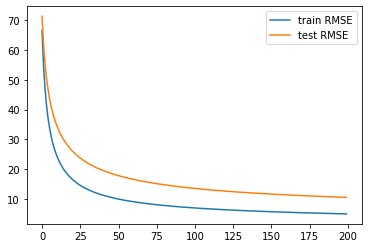

In [12]:
# plotting the values of the train and test
from matplotlib import pyplot as plt
plt.plot(train_error, label="train RMSE")
plt.plot(test_error, label="test RMSE")
plt.legend()
plt.show()

In [13]:

# given an user recommend other movies
def predict_movies(train, index):
  y_hat = predicted_values(w1, w2)
  predict_index = np.where(train[index, :] == 0)[0]
  return y_hat[index, predict_index].flatten()

id = 21

index = user_item_matrix.index.get_loc(id)



rating_predictions = predict_movies(train, index)

movies_predicted = rating_predictions.argsort()[-10:][::-1]

# reading names of movies
movies = pd.read_csv('ml-100k/u.item', sep='|',  encoding='latin-1')

predicted =  movies[movies.iloc[:,0].isin(movies_predicted)]
print(predicted.iloc[:, 1])

319                             Mother (1996)
497              Cat on a Hot Tin Roof (1958)
686                 Leave It to Beaver (1997)
945     Big Blue, The (Grand bleu, Le) (1988)
1234         Other Voices, Other Rooms (1997)
1253                    Broken English (1996)
1290                    Simple Wish, A (1997)
1294                     Indian Summer (1996)
1337              Stefano Quantestorie (1993)
1504           Nelly & Monsieur Arnaud (1995)
Name: Toy Story (1995), dtype: object
